In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_rental_data = pd.read_csv("../Data/car_feat_2019.csv")

In [3]:
car_rental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15444 entries, 0 to 15443
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          15444 non-null  int64  
 1   AVG_BEFORE_DAYS     15444 non-null  float64
 2   AVG_FARE            15444 non-null  float64
 3   CAR_TYPE            15444 non-null  object 
 4   COLLECT_DATE        15444 non-null  object 
 5   HOLIDAY             15444 non-null  int64  
 6   HOLIDAY AFTER       15444 non-null  int64  
 7   HOLIDAY BEFORE      15444 non-null  int64  
 8   LOR                 15444 non-null  int64  
 9   MAX_FARE            15444 non-null  float64
 10  MEDIAN_FARE         15444 non-null  float64
 11  MIN_FARE            15444 non-null  float64
 12  PICKUP_DATE         15444 non-null  object 
 13  TIME BEFORE RENTAL  15444 non-null  int64  
 14  CHANGE PERCENT      15443 non-null  float64
 15  CHANGE              15444 non-null  object 
dtypes: f

In [4]:
# Coverting column types and dropping the right columns
car_rental_data["COLLECT_DATE"] = pd.to_datetime(car_rental_data["COLLECT_DATE"], format='%Y-%m-%d')
car_rental_data["PICKUP_DATE"] = pd.to_datetime(car_rental_data["PICKUP_DATE"], format='%Y-%m-%d')
car_rental_data.drop(columns = "Unnamed: 0", inplace = True)

# Sorting by pickup date
car_rental_data.sort_values(by = "PICKUP_DATE", inplace=True)

In [5]:
car_rental_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15444 entries, 0 to 6210
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   AVG_BEFORE_DAYS     15444 non-null  float64       
 1   AVG_FARE            15444 non-null  float64       
 2   CAR_TYPE            15444 non-null  object        
 3   COLLECT_DATE        15444 non-null  datetime64[ns]
 4   HOLIDAY             15444 non-null  int64         
 5   HOLIDAY AFTER       15444 non-null  int64         
 6   HOLIDAY BEFORE      15444 non-null  int64         
 7   LOR                 15444 non-null  int64         
 8   MAX_FARE            15444 non-null  float64       
 9   MEDIAN_FARE         15444 non-null  float64       
 10  MIN_FARE            15444 non-null  float64       
 11  PICKUP_DATE         15444 non-null  datetime64[ns]
 12  TIME BEFORE RENTAL  15444 non-null  int64         
 13  CHANGE PERCENT      15443 non-null  float64    

In [6]:
car_rental_data.head()

,AVG_BEFORE_DAYS,AVG_FARE,CAR_TYPE,COLLECT_DATE,HOLIDAY,HOLIDAY AFTER,HOLIDAY BEFORE,LOR,MAX_FARE,MEDIAN_FARE,MIN_FARE,PICKUP_DATE,TIME BEFORE RENTAL,CHANGE PERCENT,CHANGE
0,68.16,68.16,Compact,2018-12-02,1,0,0,5,106.420000,82.37375,20.928333,2019-01-01,30,-0.001247,Decrease
8355,97.20,97.20,Premium SUV,2018-12-02,1,0,0,5,163.780000,95.13000,52.181111,2019-01-01,30,0.021708,Increase
8746,84.68,84.68,Premium Special,2018-12-02,1,0,0,5,106.182000,88.96000,65.632857,2019-01-01,30,-0.004192,Decrease
1091,68.12,68.12,Economy,2018-12-02,1,0,0,5,106.372000,82.35125,20.891667,2019-01-01,30,-0.001248,Decrease
9134,28.01,28.01,Special Special,2018-12-02,1,0,0,5,73.875714,23.80875,19.717778,2019-01-01,30,0.010710,Increase


In [7]:
car_rental_data.isnull().sum()

AVG_BEFORE_DAYS       0
AVG_FARE              0
CAR_TYPE              0
COLLECT_DATE          0
HOLIDAY               0
HOLIDAY AFTER         0
HOLIDAY BEFORE        0
LOR                   0
MAX_FARE              0
MEDIAN_FARE           0
MIN_FARE              0
PICKUP_DATE           0
TIME BEFORE RENTAL    0
CHANGE PERCENT        1
CHANGE                0
dtype: int64

In [8]:
car_rental_data.dropna(inplace=True)

In [9]:
print("Min: " , min(car_rental_data["PICKUP_DATE"]), "\nMax: ", max(car_rental_data["PICKUP_DATE"]))

Min:  2019-01-01 00:00:00 
Max:  2020-01-29 00:00:00


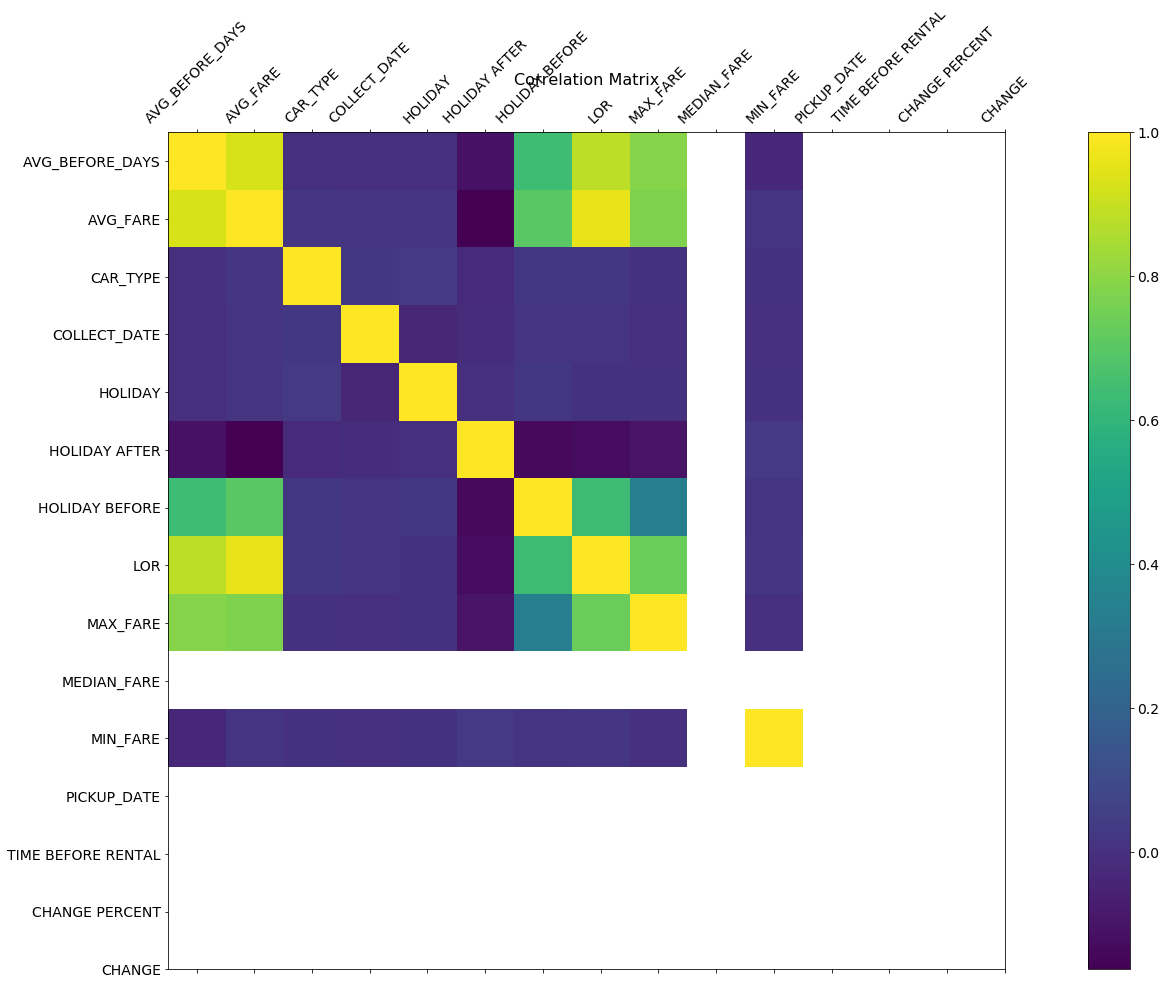

In [10]:
# Checking for correlations
f = plt.figure(figsize=(30, 15))
plt.matshow(car_rental_data.corr(), fignum=f.number)
plt.xticks(range(car_rental_data.shape[1]), car_rental_data.columns, fontsize=14, rotation=45)
plt.yticks(range(car_rental_data.shape[1]), car_rental_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [11]:
corr = car_rental_data.corr()
corr.style.background_gradient(cmap='coolwarm')

/Users/raghavsood/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/Users/raghavsood/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/raghavsood/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,AVG_BEFORE_DAYS,AVG_FARE,HOLIDAY,HOLIDAY AFTER,HOLIDAY BEFORE,LOR,MAX_FARE,MEDIAN_FARE,MIN_FARE,TIME BEFORE RENTAL,CHANGE PERCENT
AVG_BEFORE_DAYS,1.000000,0.931533,-0.000838,-0.000858,-0.005873,-0.106880,0.637391,0.882106,0.790170,nan,-0.033215
AVG_FARE,0.931533,1.000000,0.021243,0.017045,0.017303,-0.162431,0.702215,0.960814,0.773535,nan,0.018655
HOLIDAY,-0.000838,0.021243,1.000000,0.025041,0.028391,-0.022551,0.024049,0.024374,0.003952,nan,0.002258
HOLIDAY AFTER,-0.000858,0.017045,0.025041,1.000000,-0.038689,-0.010570,0.015114,0.017772,-0.001546,nan,0.001002
HOLIDAY BEFORE,-0.005873,0.017303,0.028391,-0.038689,1.000000,0.000801,0.023825,0.007860,0.005185,nan,0.003006
LOR,-0.106880,-0.162431,-0.022551,-0.010570,0.000801,1.000000,-0.133461,-0.122603,-0.101122,nan,0.028942
MAX_FARE,0.637391,0.702215,0.024049,0.015114,0.023825,-0.133461,1.000000,0.633524,0.334273,nan,0.012794
MEDIAN_FARE,0.882106,0.960814,0.024374,0.017772,0.007860,-0.122603,0.633524,1.000000,0.733585,nan,0.022925
MIN_FARE,0.790170,0.773535,0.003952,-0.001546,0.005185,-0.101122,0.334273,0.733585,1.000000,nan,-0.006086
TIME BEFORE RENTAL,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


# Extracting, converting the features

In [12]:
# Extracting year, month and date from pickup date
car_rental_data["PICKUP_DATE_YEAR"] = pd.DatetimeIndex(car_rental_data["PICKUP_DATE"]).year
car_rental_data["PICKUP_DATE_MONTH"] = pd.DatetimeIndex(car_rental_data["PICKUP_DATE"]).month
car_rental_data["PICKUP_DATE_DATE"] = pd.DatetimeIndex(car_rental_data["PICKUP_DATE"]).day

In [13]:
# converting car_type to one-hot encoded format
car_rental_data = pd.get_dummies(car_rental_data, columns = ["CAR_TYPE"] , prefix = "CAR_TYPE", drop_first=True)

In [14]:
car_rental_data.head(1)

,AVG_BEFORE_DAYS,AVG_FARE,COLLECT_DATE,HOLIDAY,HOLIDAY AFTER,HOLIDAY BEFORE,LOR,MAX_FARE,MEDIAN_FARE,MIN_FARE,...,CAR_TYPE_Standard,CAR_TYPE_Standard 2 Wheel Vehicle,CAR_TYPE_Standard Convertible,CAR_TYPE_Standard Elite SUV,CAR_TYPE_Standard Elite Special,CAR_TYPE_Standard Elite SportsCar,CAR_TYPE_Standard Pickup Regular Cab,CAR_TYPE_Standard SUV,CAR_TYPE_Standard SportsCar,CAR_TYPE_Standard Van
0,68.16,68.16,2018-12-02,1,0,0,5,106.42,82.37375,20.928333,...,0,0,0,0,0,0,0,0,0,0


In [15]:
car_rental_data.columns

Index(['AVG_BEFORE_DAYS', 'AVG_FARE', 'COLLECT_DATE', 'HOLIDAY',
       'HOLIDAY AFTER', 'HOLIDAY BEFORE', 'LOR', 'MAX_FARE', 'MEDIAN_FARE',
       'MIN_FARE', 'PICKUP_DATE', 'TIME BEFORE RENTAL', 'CHANGE PERCENT',
       'CHANGE', 'PICKUP_DATE_YEAR', 'PICKUP_DATE_MONTH', 'PICKUP_DATE_DATE',
       'CAR_TYPE_Compact Convertible', 'CAR_TYPE_Compact SUV',
       'CAR_TYPE_Economy', 'CAR_TYPE_Economy Special', 'CAR_TYPE_Fullsize',
       'CAR_TYPE_Fullsize Elite 2 Wheel Vehicle',
       'CAR_TYPE_Fullsize Elite Special',
       'CAR_TYPE_Fullsize Open Air All-Terrain',
       'CAR_TYPE_Fullsize Pickup Regular Cab',
       'CAR_TYPE_Fullsize Recreational Vehicle', 'CAR_TYPE_Fullsize SUV',
       'CAR_TYPE_Fullsize Van', 'CAR_TYPE_Luxury',
       'CAR_TYPE_Luxury Convertible', 'CAR_TYPE_Luxury Elite',
       'CAR_TYPE_Luxury Elite SUV', 'CAR_TYPE_Luxury Elite Special',
       'CAR_TYPE_Luxury Elite Special Offer Car', 'CAR_TYPE_Luxury SUV',
       'CAR_TYPE_Luxury SportsCar', 'CAR_TYPE_Mids

In [16]:
# Filtering features and creating a copy
classification_drop_features = ["AVG_FARE","COLLECT_DATE","LOR", 'MAX_FARE', 'MEDIAN_FARE',
       'MIN_FARE', 'PICKUP_DATE', 'TIME BEFORE RENTAL', "CHANGE PERCENT"]
classification_data = car_rental_data.copy()
classification_data.drop(columns = classification_drop_features, inplace=True)

In [17]:
classification_data.head()

,AVG_BEFORE_DAYS,HOLIDAY,HOLIDAY AFTER,HOLIDAY BEFORE,CHANGE,PICKUP_DATE_YEAR,PICKUP_DATE_MONTH,PICKUP_DATE_DATE,CAR_TYPE_Compact Convertible,CAR_TYPE_Compact SUV,...,CAR_TYPE_Standard,CAR_TYPE_Standard 2 Wheel Vehicle,CAR_TYPE_Standard Convertible,CAR_TYPE_Standard Elite SUV,CAR_TYPE_Standard Elite Special,CAR_TYPE_Standard Elite SportsCar,CAR_TYPE_Standard Pickup Regular Cab,CAR_TYPE_Standard SUV,CAR_TYPE_Standard SportsCar,CAR_TYPE_Standard Van
0,68.16,1,0,0,Decrease,2019,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8355,97.20,1,0,0,Increase,2019,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8746,84.68,1,0,0,Decrease,2019,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1091,68.12,1,0,0,Decrease,2019,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9134,28.01,1,0,0,Increase,2019,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Scaling data

In [18]:
classification_data.columns

Index(['AVG_BEFORE_DAYS', 'HOLIDAY', 'HOLIDAY AFTER', 'HOLIDAY BEFORE',
       'CHANGE', 'PICKUP_DATE_YEAR', 'PICKUP_DATE_MONTH', 'PICKUP_DATE_DATE',
       'CAR_TYPE_Compact Convertible', 'CAR_TYPE_Compact SUV',
       'CAR_TYPE_Economy', 'CAR_TYPE_Economy Special', 'CAR_TYPE_Fullsize',
       'CAR_TYPE_Fullsize Elite 2 Wheel Vehicle',
       'CAR_TYPE_Fullsize Elite Special',
       'CAR_TYPE_Fullsize Open Air All-Terrain',
       'CAR_TYPE_Fullsize Pickup Regular Cab',
       'CAR_TYPE_Fullsize Recreational Vehicle', 'CAR_TYPE_Fullsize SUV',
       'CAR_TYPE_Fullsize Van', 'CAR_TYPE_Luxury',
       'CAR_TYPE_Luxury Convertible', 'CAR_TYPE_Luxury Elite',
       'CAR_TYPE_Luxury Elite SUV', 'CAR_TYPE_Luxury Elite Special',
       'CAR_TYPE_Luxury Elite Special Offer Car', 'CAR_TYPE_Luxury SUV',
       'CAR_TYPE_Luxury SportsCar', 'CAR_TYPE_Midsize',
       'CAR_TYPE_Midsize Convertible', 'CAR_TYPE_Midsize Open Air All-Terrain',
       'CAR_TYPE_Midsize Pickup Regular Cab', 'CAR_TYPE_M

In [19]:
# classification_data[["AVG_BEFORE_DAYS", "CHANGE PERCENT"]].head(20)
classification_data[["AVG_BEFORE_DAYS"]].head(20)

,AVG_BEFORE_DAYS
0,68.16
8355,97.20
8746,84.68
1091,68.12
9134,28.01
9525,71.79
9916,101.03
7966,78.55
10307,104.31
10698,77.51


In [20]:
# Scaling AVG_BEFORE_DAYS and CHANGE PERCENT
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# classification_data[["AVG_BEFORE_DAYS", "CHANGE PERCENT"]] = scaler.fit_transform(classification_data[["AVG_BEFORE_DAYS", "CHANGE PERCENT"]])
classification_data[["AVG_BEFORE_DAYS"]] = scaler.fit_transform(classification_data[["AVG_BEFORE_DAYS"]])

In [21]:
# classification_data[["AVG_BEFORE_DAYS", "CHANGE PERCENT"]].head(20)
classification_data[["AVG_BEFORE_DAYS"]].head(20)

,AVG_BEFORE_DAYS
0,-0.552255
8355,0.269618
8746,-0.084715
1091,-0.553387
9134,-1.688556
9525,-0.449520
9916,0.378012
7966,-0.258203
10307,0.470841
10698,-0.287636


# Machine Learning - Random Forest

In [22]:
# Extracting columns
classification_columns = [x for x in classification_data.columns.to_list() if x != "CHANGE"]
X = classification_data[classification_columns]
y = classification_data["CHANGE"]

In [23]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

In [24]:
# Checking correct sort order for train test splits
print("Min train date:", min(X_train["PICKUP_DATE_YEAR"]*100 + X_train["PICKUP_DATE_MONTH"]))
print("Max train date:", max(X_train["PICKUP_DATE_YEAR"]*100 + X_train["PICKUP_DATE_MONTH"]))

Min train date: 201901
Max train date: 201910


In [25]:
# Importing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score, make_scorer

In [26]:
# Default model
default = RandomForestClassifier(random_state=1)
default.fit(X_train, y_train)
default_pred = default.predict(X_test)
print("Accuracy for default Random Forest on CV data: ",accuracy_score(y_test,default_pred))
print()
print("Balanced Accuracy for default Random Forest on CV data: ",balanced_accuracy_score(y_test,default_pred))
print()
for x, y in zip(X_train.columns.tolist(), default.feature_importances_):
    print(x,round(y,2))
print()
print("AUC", roc_auc_score(y_test, default.predict_proba(X_test)[:,1]))

Accuracy for default Random Forest on CV data:  0.5551478523634794

Balanced Accuracy for default Random Forest on CV data:  0.5562414620981595

AVG_BEFORE_DAYS 0.26
HOLIDAY 0.01
HOLIDAY AFTER 0.01
HOLIDAY BEFORE 0.01
PICKUP_DATE_YEAR 0.0
PICKUP_DATE_MONTH 0.28
PICKUP_DATE_DATE 0.23
CAR_TYPE_Compact Convertible 0.01
CAR_TYPE_Compact SUV 0.0
CAR_TYPE_Economy 0.0
CAR_TYPE_Economy Special 0.0
CAR_TYPE_Fullsize 0.0
CAR_TYPE_Fullsize Elite 2 Wheel Vehicle 0.0
CAR_TYPE_Fullsize Elite Special 0.01
CAR_TYPE_Fullsize Open Air All-Terrain 0.0
CAR_TYPE_Fullsize Pickup Regular Cab 0.01
CAR_TYPE_Fullsize Recreational Vehicle 0.0
CAR_TYPE_Fullsize SUV 0.01
CAR_TYPE_Fullsize Van 0.01
CAR_TYPE_Luxury 0.0
CAR_TYPE_Luxury Convertible 0.0
CAR_TYPE_Luxury Elite 0.01
CAR_TYPE_Luxury Elite SUV 0.01
CAR_TYPE_Luxury Elite Special 0.0
CAR_TYPE_Luxury Elite Special Offer Car 0.0
CAR_TYPE_Luxury SUV 0.0
CAR_TYPE_Luxury SportsCar 0.01
CAR_TYPE_Midsize 0.0
CAR_TYPE_Midsize Convertible 0.0
CAR_TYPE_Midsize Open Air

In [41]:
%timeit
rfc = RandomForestClassifier(random_state=1)
# Setting grid parameters
n_estimators = [100, 200, 300, 500, 800]
max_depth = [None, 4, 5, 6, 7, 8, 9, 10]
max_features = ['auto', 'sqrt', 'log2']
# min_samples_split = [2, 5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10]
criterion = ['gini', 'entropy']


parameters = dict(n_estimators = n_estimators, max_depth = max_depth,
                  criterion = criterion, max_features = max_features)

gridF = GridSearchCV(estimator = rfc, param_grid = parameters, cv = 5, verbose = 1,
                      n_jobs = -1)
gridF.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  8.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [42]:
# Best parameters
gridF.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 300}

In [43]:
# Reinitializing the best model
best_model = RandomForestClassifier(random_state=1, criterion="entropy", max_depth=8, max_features="auto", 
                                   n_estimators=300)
best_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [44]:
pred = best_model.predict(X_test)
print("Accuracy for best Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for best Random Forest on CV data:  0.4752859917979711


In [45]:
print("Balanced Accuracy for default Random Forest on CV data: ",balanced_accuracy_score(y_test,pred))

Balanced Accuracy for default Random Forest on CV data:  0.498577932376027


In [46]:
print("AUC", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))

AUC 0.5343764735224598


In [47]:
for x, y in zip(X_train.columns.tolist(), best_model.feature_importances_):
    print(x,round(y,2))

AVG_BEFORE_DAYS 0.18
HOLIDAY 0.01
HOLIDAY AFTER 0.02
HOLIDAY BEFORE 0.01
PICKUP_DATE_YEAR 0.0
PICKUP_DATE_MONTH 0.4
PICKUP_DATE_DATE 0.22
CAR_TYPE_Compact Convertible 0.0
CAR_TYPE_Compact SUV 0.0
CAR_TYPE_Economy 0.0
CAR_TYPE_Economy Special 0.0
CAR_TYPE_Fullsize 0.0
CAR_TYPE_Fullsize Elite 2 Wheel Vehicle 0.0
CAR_TYPE_Fullsize Elite Special 0.01
CAR_TYPE_Fullsize Open Air All-Terrain 0.0
CAR_TYPE_Fullsize Pickup Regular Cab 0.0
CAR_TYPE_Fullsize Recreational Vehicle 0.0
CAR_TYPE_Fullsize SUV 0.01
CAR_TYPE_Fullsize Van 0.0
CAR_TYPE_Luxury 0.0
CAR_TYPE_Luxury Convertible 0.01
CAR_TYPE_Luxury Elite 0.0
CAR_TYPE_Luxury Elite SUV 0.0
CAR_TYPE_Luxury Elite Special 0.0
CAR_TYPE_Luxury Elite Special Offer Car 0.0
CAR_TYPE_Luxury SUV 0.0
CAR_TYPE_Luxury SportsCar 0.0
CAR_TYPE_Midsize 0.0
CAR_TYPE_Midsize Convertible 0.0
CAR_TYPE_Midsize Open Air All-Terrain 0.0
CAR_TYPE_Midsize Pickup Regular Cab 0.0
CAR_TYPE_Midsize SUV 0.0
CAR_TYPE_Mini Van 0.0
CAR_TYPE_Premium 0.0
CAR_TYPE_Premium Crossover